# Import

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [4]:
# 코랩으로 불러올 파일의 마우스 우클릭으로 경로 복사를 통해 불러옴. 
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris_test.csv')

# 데이터 탐색

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [6]:
# count : 개수 / mean : 평균 / std : 표준편차 
train_set.describe()

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.000000,6.044000,4.258667,2.958667,1.384000
std,21.794495,0.842653,1.615390,0.388376,0.697106
min,0.000000,4.300000,1.100000,2.000000,0.100000
25%,18.500000,5.550000,3.750000,2.800000,1.000000
50%,37.000000,6.100000,4.700000,3.000000,1.500000
75%,55.500000,6.600000,5.300000,3.200000,1.850000
max,74.000000,7.700000,6.900000,4.000000,2.500000


# 데이터 전처리

In [7]:
# 데이터의 구분자로 활용되는 id 항목을 제외시킴
train_set.drop(['id'], axis = 1, inplace = True)
test_set.drop(['id'], axis = 1, inplace = True)

In [8]:
# 명목형 자료 항목 변환에는 1) 수치 매핑 기법, 2) 더미 기법이 있음
# 1) 수치 매핑 기법 채택
train_set.replace({'setosa' : 1, 'versicolor' : 2, 'virginica' : 3}, inplace=True)
test_set.replace({'setosa' : 1, 'versicolor' : 2, 'virginica' : 3}, inplace=True)

In [9]:
train_set

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,1,4.4,1.4,2.9,0.2
1,2,6.4,4.5,3.2,1.5
2,3,6.2,4.8,2.8,1.8
3,3,7.2,6.1,3.6,2.5
4,1,4.9,1.4,3.0,0.2
...,...,...,...,...,...
70,2,6.5,4.6,2.8,1.5
71,2,5.6,3.6,2.9,1.3
72,2,6.2,4.5,2.2,1.5
73,2,4.9,3.3,2.4,1.0


In [10]:
test_set

,species,sepal length (cm),petal length (cm)
0,1,5.4,1.7
1,1,5.7,1.5
2,1,5.3,1.5
3,1,5.1,1.9
4,3,6.0,4.8
...,...,...,...
70,2,5.8,4.0
71,1,4.4,1.3
72,3,6.3,5.6
73,2,5.1,3.0


## 접근 방식 선정
### 1. 꽃잎, 꽃받침 너비 두 개를 같이 예측하는 "다변량 회귀"
### 2. 꽃잎, 꽃받침 너비 각각을 따로 예측하는 "단변량 회귀"

# 1.다변량회귀
- 기본적으로 지원하는 트리계열 모델 중 의사결정나무, 랜덤포레스트가 있음
- 나머지 모델에 있어서는 다변량회귀를 지원해 주는 함수를 사용해야함.
- 하루 제출 3번이라는 제약이 있어 "단변량 회귀"의 성능이 더 좋을 것이라는 가설을 세우고 기본으로 제공하는 모델만 이용함.

In [11]:
# 데이터 분리
X = train_set[['species', 'sepal length (cm)', 'petal length (cm)']]
Y = train_set[['sepal width (cm)', 'petal width (cm)']] 

In [12]:
# 의사결정나무(decision tree)

In [13]:
# validation_set : training을 한 후에 만들어진 모형이 잘 예측을 하는지 그 성능을 평가하기 위해서 사용
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [14]:
dt = DecisionTreeRegressor()

In [15]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
predict_dt = dt.predict(X_val)

In [17]:
print(f'MAE : {mean_absolute_error(y_val, predict_dt): .4f}')

MAE :  0.2533


dt.predict(test_set) → MAE : 0.215

In [18]:
# 랜덤 포레스트(RandomForestRegressor)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [20]:
# n_estimators : 의사결정나무의 개수 지정, 기본값 = 100
rf = RandomForestRegressor(n_estimators=1000)

In [21]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
predict_rf = rf.predict(X_val)

In [23]:
print(f'MAE : {mean_absolute_error(y_val, predict_rf): .4f}')

MAE :  0.1840


rf.predict(test_set) → MAE : 0.183

# 2.단변량회귀
- 종속변수를 각각 하나씩 나눠 진행, 즉 모델 두 개로 각각 예측해 취합함

In [42]:
train_sepal = train_set[['species', 'sepal length (cm)', 'sepal width (cm)']]
train_petal = train_set[['species', 'petal length (cm)', 'petal width (cm)']]

test_sepal = test_set[['species',	'sepal length (cm)']]
test_petal = test_set[['species',	'petal length (cm)']]

In [43]:
X_s = train_sepal[['species', 'sepal length (cm)']]
y_s = train_sepal[['sepal width (cm)']]

X_p = train_petal[['species', 'petal length (cm)']]
y_p = train_petal[['petal width (cm)']]

In [44]:
# random_state 값을 바꿔가며 validation_set을 이용해 평가하는 과정에서 가장 적은 MAE 출력하는 값을 넣음
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size = 0.2, random_state=50)
X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p, y_p, test_size = 0.2, random_state=42)

- 단변량회귀를 진행하는데 있어 가장 좋은 모델은 서포트벡터머신 이었음.
- 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터라고함.
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습.

## 매개변수 튜닝
- SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
- 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법 사용
- StandardScaler(), MinMaxScaler() 이용

### sepal

In [59]:
pipline = Pipeline([('scaler',StandardScaler()), ('svm', SVR()) ])
pipline.fit(X_train_s, y_train_s)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [60]:
# C = 정규화 매개 변수, 강도는 C에 반비례, L2 페널티(릿지)
# gamma = 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 가짐.
params = {
            'svm__C'     : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'svm__gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] 
         }
grid = GridSearchCV(pipline, param_grid = params, cv = 5, scoring = 'neg_mean_absolute_error', verbose=2)
grid.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.001 .................................
[CV] .................. svm__C=0.0001, svm__gamma=0.001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.001 .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000],
                         'svm__ga

In [75]:
grid.best_params_

{'svm__C': 10, 'svm__gamma': 0.1}

In [76]:
svm_1 = make_pipeline(MinMaxScaler(), SVR(C = 10, gamma = 0.1))

In [77]:
svm_1.fit(X_train_s, y_train_s)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svr',
                 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [78]:
predict_svm_s = svm_1.predict(X_val_s)

In [79]:
print(f'MAE : {mean_absolute_error(y_val_s, predict_svm_s): .4f}')

MAE :  0.2176


### petal

In [80]:
pipline = Pipeline([('scaler',StandardScaler()), ('svm', SVR()) ])
pipline.fit(X_train_p, y_train_p)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [81]:
params = {
            'svm__C'     : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'svm__gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] 
         }
grid = GridSearchCV(pipline, param_grid = params, cv = 5, scoring = 'neg_mean_absolute_error', verbose=2)
grid.fit(X_train_p, y_train_p)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.0001 ................................
[CV] ................. svm__C=0.0001, svm__gamma=0.0001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.001 .................................
[CV] .................. svm__C=0.0001, svm__gamma=0.001, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=0.001 .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=10 ....................................
[CV] ..................... svm__C=0.0001, svm__gamma=10, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .................... svm__C=0.0001, svm__gamma=100, total=   0.0s
[CV] svm__C=0.0001, svm__gamma=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='rbf',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000],
                         'svm__ga

In [82]:
grid.best_params_

{'svm__C': 100, 'svm__gamma': 0.01}

In [84]:
svm_2 = make_pipeline(StandardScaler(), SVR(C=100, gamma=0.01))

In [85]:
svm_2.fit(X_train_p, y_train_p)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [87]:
predict_svm_p = svm_2.predict(X_val_p)

In [88]:
print(f'MAE : {mean_absolute_error(y_val_p, predict_svm_p): .4f}')

MAE :  0.1216


# 예측

In [90]:
predict_sepal = svm_1.predict(test_sepal)
predict_sepal

array([3.19948641, 3.25305851, 3.18217534, 3.14842649, 2.76412369,
       2.71183295, 3.19948641, 3.13200608, 3.11589963, 2.90403877,
       3.11589963, 3.10011538, 2.84488492, 3.30758187, 2.81331334,
       2.84488492, 3.06954544, 3.01338875, 2.92747745, 2.79074785,
       2.87236984, 3.10011538, 2.83551665, 3.14842649, 2.79144803,
       3.10011538, 3.14842649, 3.16515244, 3.19948641, 3.01338875,
       2.85804646, 3.16515244, 3.04035815, 2.98475374, 2.90011351,
       3.14842649, 3.05477522, 2.83551665, 3.13200608, 3.07353336,
       3.14842649, 3.13200608, 3.15906924, 3.13200608, 3.24795405,
       3.06954544, 2.81767291, 2.6875805 , 3.25305851, 2.95119503,
       3.13200608, 2.79144803, 2.79144803, 2.76993203, 3.21707671,
       2.90403877, 3.21707671, 2.81331334, 3.13200608, 2.97517925,
       2.95631987, 2.79144803, 2.95631987, 2.87236984, 3.08466137,
       3.14842649, 2.95631987, 3.14842649, 3.16515244, 2.83551665,
       2.85804646, 3.04035815, 2.84488492, 2.70759011, 2.73781

In [91]:
predict_petal = svm_2.predict(test_petal)
predict_petal

array([0.28996931, 0.2298988 , 0.2298988 , 0.35035157, 1.7781035 ,
       1.85420182, 0.2298988 , 0.19999981, 0.2298988 , 1.3995354 ,
       0.19999981, 0.19999981, 1.85420182, 2.15794219, 1.31376196,
       1.82905907, 0.19999981, 1.85420182, 1.42780228, 1.97632704,
       1.97632704, 0.35035157, 1.28487023, 0.25989121, 1.16799373,
       0.25989121, 0.28996931, 0.19999981, 0.17020193, 1.92821788,
       1.22667921, 0.2298988 , 0.17020193, 2.04652698, 1.87911314,
       0.2298988 , 0.17020193, 1.31376196, 0.25989121, 1.45589537,
       0.2298988 , 0.17020193, 2.09195587, 0.25989121, 2.09195587,
       0.08149127, 1.92821788, 1.04937829, 0.28996931, 1.34250817,
       0.25989121, 1.37110169, 1.19739458, 1.3995354 , 0.17020193,
       1.56639339, 0.19999981, 1.28487023, 0.14051281, 1.37110169,
       1.99999427, 1.25584021, 1.97632704, 1.95239973, 0.25989121,
       0.2298988 , 1.87911314, 0.19999981, 0.2298988 , 1.31376196,
       1.25584021, 0.17020193, 1.97632704, 0.95956696, 1.85420

# 제출

In [92]:
# 경로 복사 
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
submission

,id,sepal width (cm),petal width (cm)
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
70,70,0,0
71,71,0,0
72,72,0,0
73,73,0,0


In [93]:
submission['sepal width (cm)'] = predict_sepal
submission['petal width (cm)'] = predict_petal

In [94]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv', index = False)

※ 리더보드 private 5th로 최종 제출한 결과물은 현재 코드에서 GridserachCV 제외, SVR 모델의 하이퍼 파라미터 값을 기본으로 한 결과물 입니다.

# 아쉬웠던 점
- 철저히 public 점수에 집착해 private 점수 기준 더 좋은 결과물이 나왔을 수도 있었을 현재 코드 결과물을 최종 제출본으로 하지 않은 점
- 결과물 제출 이후 진행한 독립변수들 간 상관 관계 분석에서 꽃받침 / 꽃잎 너비 사이에 유의미한 관계를 모델 학습 과정에서 배제한 점
- svm 모델에 대한 이해도가 부족해 다양한 하이퍼 파라미터 값 조정을 시도하지 않은 점

In [97]:
train_set.corr(method='pearson')

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
species,1.000000,0.705445,0.920749,-0.303901,0.937646
sepal length (cm),0.705445,1.000000,0.864852,0.027104,0.763597
petal length (cm),0.920749,0.864852,1.000000,-0.274590,0.953549
sepal width (cm),-0.303901,0.027104,-0.274590,1.000000,-0.217103
petal width (cm),0.937646,0.763597,0.953549,-0.217103,1.000000


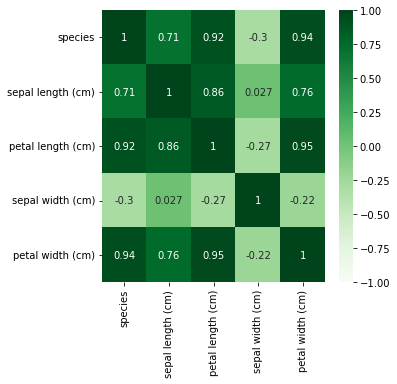

In [100]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(train_set.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트영역
          );